In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
inningsDf = pd.read_csv("./data/innings.csv")
inningsDf = inningsDf.drop(inningsDf.columns[0], axis=1)

inningsDf.head()

,id,innings,batsman,bowler,non-striker,bat_runs,extra_runs,total_runs,player_out,kind,fielders,wicket
0,548356,1st,DJ Harris,Z Khan,S Dhawan,1,0,1,NaN,NaN,NaN,False
1,548356,1st,S Dhawan,Z Khan,DJ Harris,4,0,4,NaN,NaN,NaN,False
2,548356,1st,S Dhawan,Z Khan,DJ Harris,0,0,0,NaN,NaN,NaN,False
3,548356,1st,S Dhawan,Z Khan,DJ Harris,0,1,1,NaN,NaN,NaN,False
4,548356,1st,S Dhawan,Z Khan,DJ Harris,4,0,4,NaN,NaN,NaN,False


In [3]:
matchesDf = pd.read_csv("./data/matches.csv")
matchesDf = matchesDf.drop(matchesDf.columns[0], axis=1)
matchesDf

,city,date,dl_applied,eliminator,id,overs,player_of_match,result,season,team1,team2,toss_decision,toss_winner,umpire1,umpire2,umpire3,venue,win_by_runs,win_by_wickets,winner
0,Dharamsala,2010-04-18,NaN,NaN,419159,20,MS Dhoni,NaN,2010,Kings XI Punjab,Chennai Super Kings,field,Chennai Super Kings,BF Bowden,AM Saheba,NaN,Himachal Pradesh Cricket Association Stadium,NaN,6.0,Chennai Super Kings
1,Chennai,2010-03-31,NaN,NaN,419133,20,M Vijay,NaN,2010,Chennai Super Kings,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,BG Jerling,RE Koertzen,NaN,"MA Chidambaram Stadium, Chepauk",NaN,5.0,Chennai Super Kings
2,Delhi,2010-03-29,NaN,NaN,419131,20,DA Warner,NaN,2010,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,SS Hazare,SJA Taufel,NaN,Feroz Shah Kotla,40.0,NaN,Delhi Daredevils
3,Pune,2013-04-30,NaN,NaN,598038,20,MS Dhoni,NaN,2013,Pune Warriors,Chennai Super Kings,bat,Chennai Super Kings,S Das,SJA Taufel,NaN,Subrata Roy Sahara Stadium,37.0,NaN,Chennai Super Kings
4,Jaipur,2012-05-13,NaN,NaN,548365,20,A Chandila,NaN,2012,Rajasthan Royals,Pune Warriors,bat,Rajasthan Royals,BF Bowden,SK Tarapore,NaN,Sawai Mansingh Stadium,45.0,NaN,Rajasthan Royals
5,Mumbai,2012-04-22,NaN,NaN,548334,20,SE Marsh,NaN,2012,Mumbai Indians,Kings XI Punjab,bat,Mumbai Indians,S Ravi,RJ Tucker,NaN,Wankhede Stadium,NaN,6.0,Kings XI Punjab
6,Hyderabad,2019-04-17,NaN,NaN,1178408,20,DA Warner,NaN,2019,Sunrisers Hyderabad,Chennai Super Kings,bat,Chennai Super Kings,UV Gandhe,IJ Gould,NaN,"Rajiv Gandhi International Stadium, Uppal",NaN,6.0,Sunrisers Hyderabad
7,Bengaluru,2019-04-24,NaN,NaN,1178417,20,AB de Villiers,NaN,2019,Royal Challengers Bangalore,Kings XI Punjab,field,Kings XI Punjab,C Shamshuddin,BNJ Oxenford,NaN,M.Chinnaswamy Stadium,17.0,NaN,Royal Challengers Bangalore
8,Kolkata,2018-05-15,NaN,NaN,1136609,20,Kuldeep Yadav,NaN,2018,Kolkata Knight Riders,Rajasthan Royals,field,Kolkata Knight Riders,HDPK Dharmasena,AK Chaudhary,NaN,Eden Gardens,NaN,6.0,Kolkata Knight Riders
9,Kolkata,2011-04-11,NaN,NaN,501203,20,JH Kallis,NaN,2011,Kolkata Knight Riders,Deccan Chargers,bat,Kolkata Knight Riders,RE Koertzen,SK Tarapore,NaN,Eden Gardens,9.0,NaN,Kolkata Knight Riders


In [4]:
finalDf = inningsDf.set_index('id').join(matchesDf.set_index('id'))

In [5]:
finalDf.columns

Index(['innings', 'batsman', 'bowler', 'non-striker', 'bat_runs', 'extra_runs',
       'total_runs', 'player_out', 'kind', 'fielders', 'wicket', 'city',
       'date', 'dl_applied', 'eliminator', 'overs', 'player_of_match',
       'result', 'season', 'team1', 'team2', 'toss_decision', 'toss_winner',
       'umpire1', 'umpire2', 'umpire3', 'venue', 'win_by_runs',
       'win_by_wickets', 'winner'],
      dtype='object')

In [6]:
def team_name_preprocessing(df):
    df.loc[df["team1"] == "Rising Pune Supergiant", ["team1"] ] = "Rising Pune Supergiants"
    df.loc[df["toss_winner"] == "Rising Pune Supergiant", ["toss_winner"] ] = "Rising Pune Supergiants"
    df.loc[df["team2"] == "Rising Pune Supergiant", ["team2"] ] = "Rising Pune Supergiants"
    df.loc[df["winner"] == "Rising Pune Supergiant", ["winner"] ] = "Rising Pune Supergiants"
    return df

def wrapper(df):
    if any():
        df["batting"] = df["team1"]
    elif df["toss_winner"] != df["team1"]:
        df["batting"] = df["team2"]
    return df["batting"]
        
def batting_team(df):
    df.loc["batting"] = df["team1"]
    condition = df[(df["toss_decision"] == "field") & (df["innings"] == "2nd") |
                   (df["toss_decision"] == "bat") & (df["innings"] == "1st")]
    df.loc[condition, ["batting"]] = df.loc[condition, ["toss_winner"]]
    df.loc[(~condition) & (df["toss_winner"] != df["team1"]),["batting"]] = df.loc[(~condition) & (df["toss_winner"] != df["team1"]),
                                                                           ["team2"]]
    return df
   
finalDf = team_name_preprocessing(finalDf)
# finalDf = batting_team(finalDf)


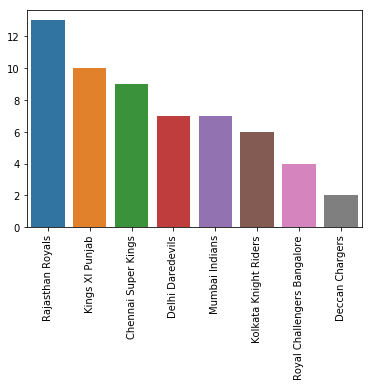

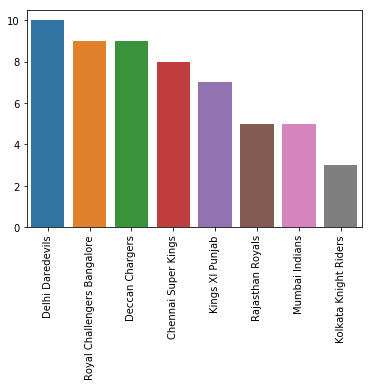

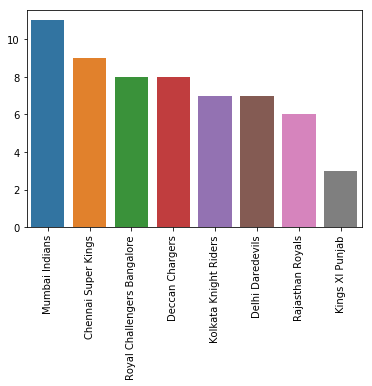

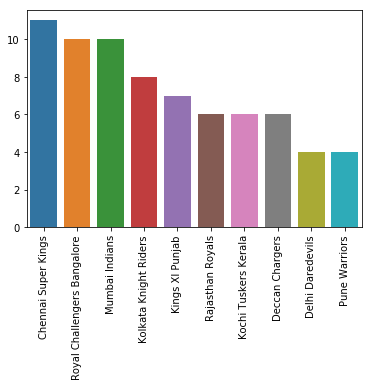

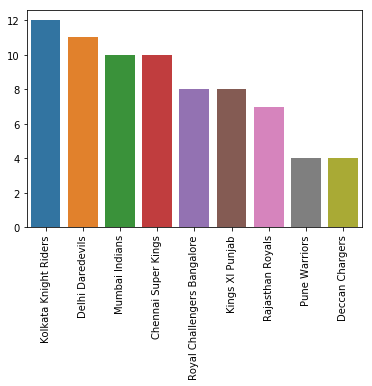

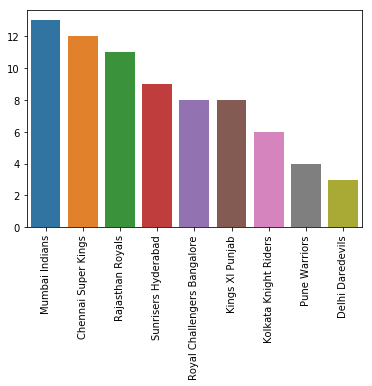

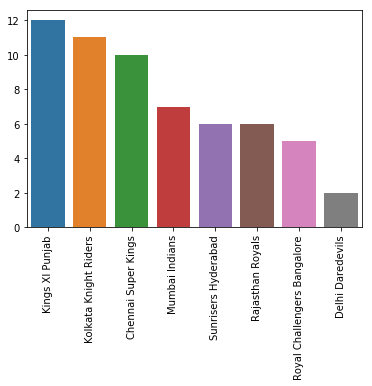

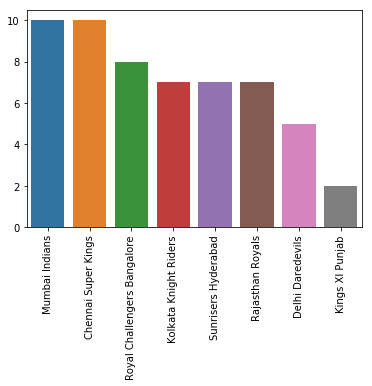

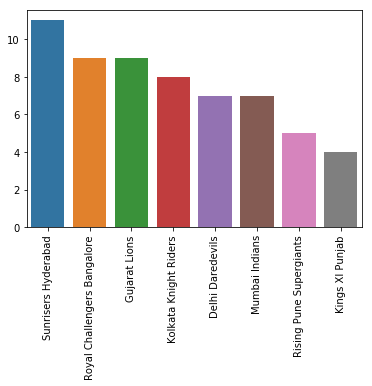

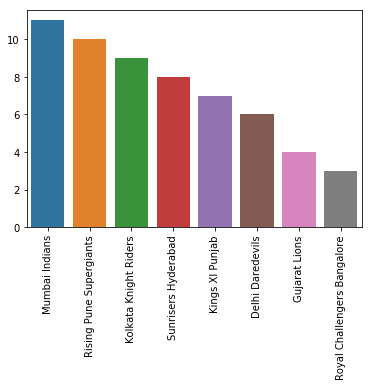

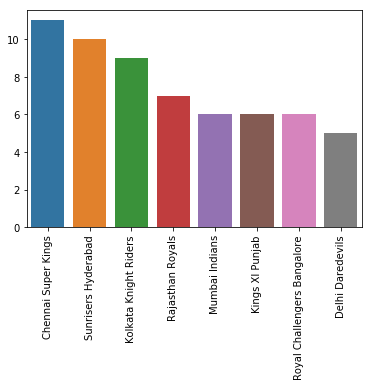

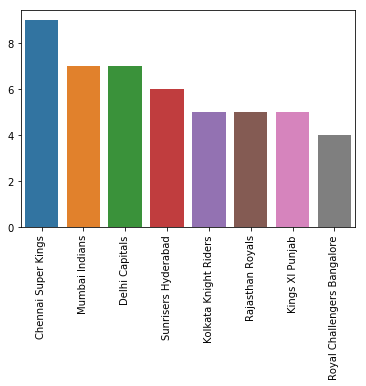

In [12]:
for id_, tdf in matchesDf.groupby(["season"]):
    temp = tdf["winner"].value_counts()
    sns.barplot(temp.index, temp.values)  
    plt.xticks(rotation=90)
    plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

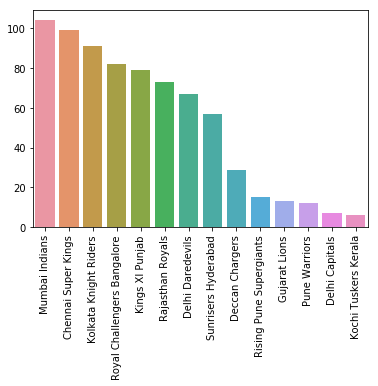

In [13]:
temp = matchesDf["winner"].value_counts()
sns.barplot(temp.index, temp.values)  
plt.xticks(rotation=90)

In [9]:
condition = df[(df["toss_decision"] == "field") & (df["innings"] == "2nd") |
               (df["toss_decision"] == "bat") & (df["innings"] == "1st")]
df.loc[condition, ["batting"]] = df.loc[condition, ["toss_winner"]]

NameError: name 'df' is not defined